# Image processing features

## Image loading / display

The `load_image` is the main loading method, leveraging `tf.image.decode_image` or `PIL.Image.open`, depending on the keras backend. This function is compatible with the `tensorflow graph` mode (no matter the backend), and returns either a `tf.Tensor`, either a `np.ndarray`, either a `keras Tensor` object (with dtype `dtype`, default to `float32`). Note that the `resize_image` is always performed with `keras` function, meaning that the return value is a `keras backend Tensor` when reshaping the image ;)

The `plot / plot_multiple` functions can display images, thanks to `plt.imshow`. By default, the `plot_type = 'imshow'` is forced for 3-D array, but it may be useful to set it explicitely when plotting multiple images (with `plot_multiple`).

An alternative to `plot` is the `display_image` function, that leverages `IPython.display.Image`. Its major benefit is that it handles multiple types of images (e.g., animations / videos / files). 

Image shape : (512, 512, 3) with type EagerTensor


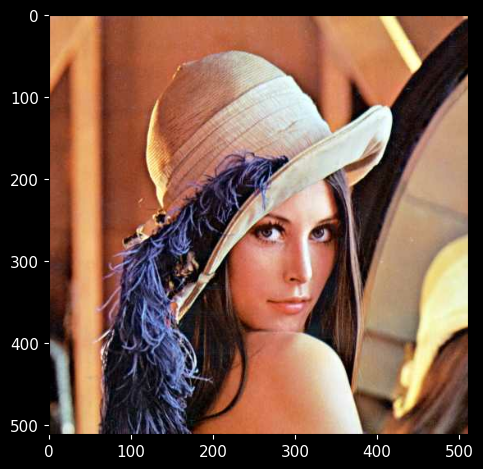

In [2]:
import os

from utils import plot, plot_multiple
from utils.image import load_image, display_image, augment_image
from utils.image.bounding_box import *

path = os.path.join('example_data', 'images', 'lena.jpg')
# Load the image as a tf.Tensor
image = load_image(path)
print("Image shape : {} with type {}".format(image.shape, image.__class__.__name__))
# Plots the image (the `plot_type = 'imshow'` is optional : it automatically uses it for 3-D arrays)
_ = plot(image)

## Image augmentation

Image augmentation is a typical way to augment data during training. There exist multiple ways to perform image augmentation, by modifying contrast, brightness, add noise, or modify the image itself by flips or crops. These methods are provided towards an easy interface, the `augment_image` function. To better demonstrate the effect, 4 images have been generated for each augmentation method with 100% probability (i.e., force the augmntation). 

The `color` transformation is the combination of the 4 transformations below. 

The `augment_image` method supports (a list of) names (the transformation name) or `callable` (a function). 

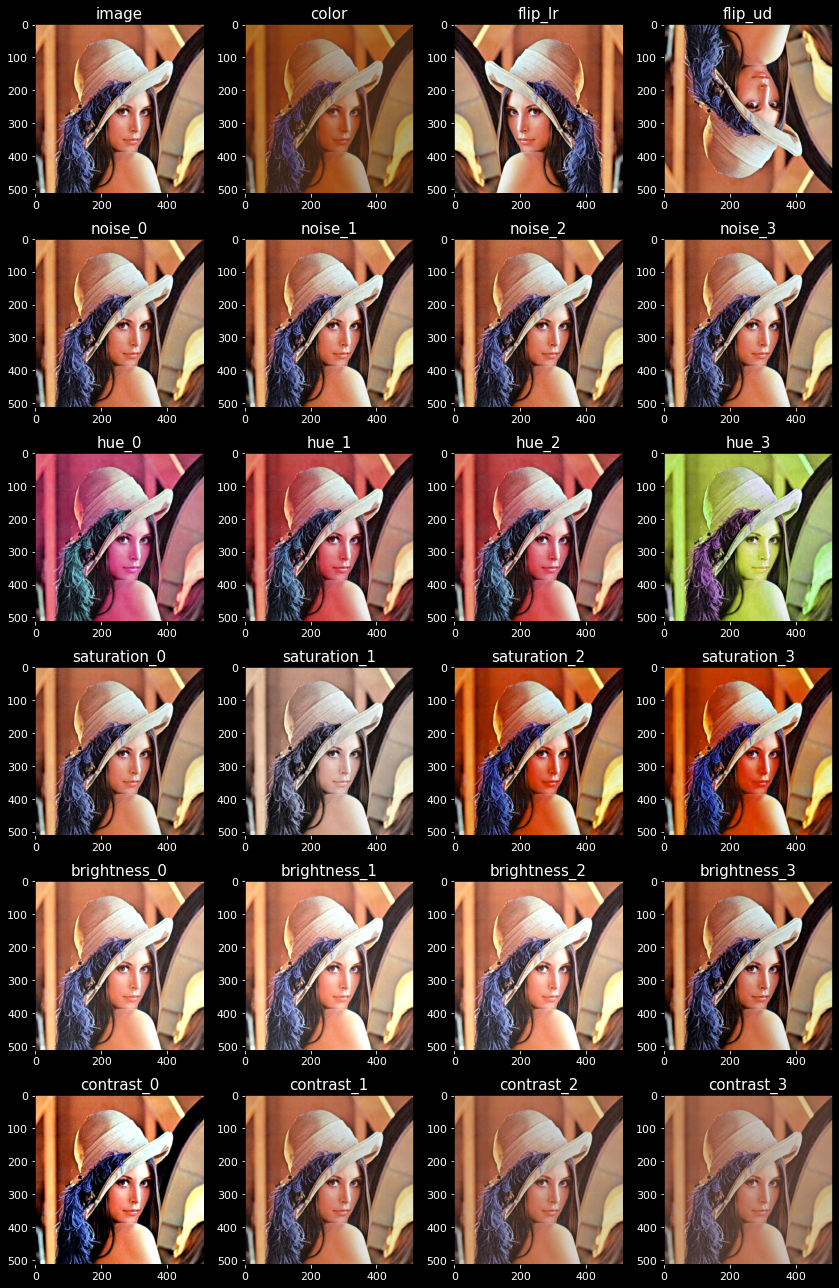

In [2]:
transformed = {
    'image' : image,
    'color' : augment_image(image, 'color', 1.),
    'flip_lr' : augment_image(image, 'flip_horizontal', 1.),
    'flip_ud' : augment_image(image, 'flip_vertical', 1.)
}
transformed.update({
    'noise_{}'.format(i) : augment_image(image, 'noise', 1.) for i in range(4)
})
transformed.update({
    'hue_{}'.format(i) : augment_image(image, 'hue', 1.) for i in range(4)
})
transformed.update({
    'saturation_{}'.format(i) : augment_image(image, 'saturation', 1.) for i in range(4)
})
transformed.update({
    'brightness_{}'.format(i) : augment_image(image, 'brightness', 1.) for i in range(4)
})
transformed.update({
    'contrast_{}'.format(i) : augment_image(image, 'contrast', 1.) for i in range(4)
})


plot_multiple(
    ** transformed, plot_type = 'imshow', size = 3, ncols = 4,
    filename = 'example_data/plots/example_augmentations.png', show = True
)

## Masking 

The next section will show more concrete example usages of masking based on bounding box mask. 

By default, a `mask` is an array of boolean, but it can *smoothed*, which transforms it into a floating point array of mask intensity (1 = mask, 0 = no mask). 

The `apply_mask` method automatically converts it to an array of float to apply it. 

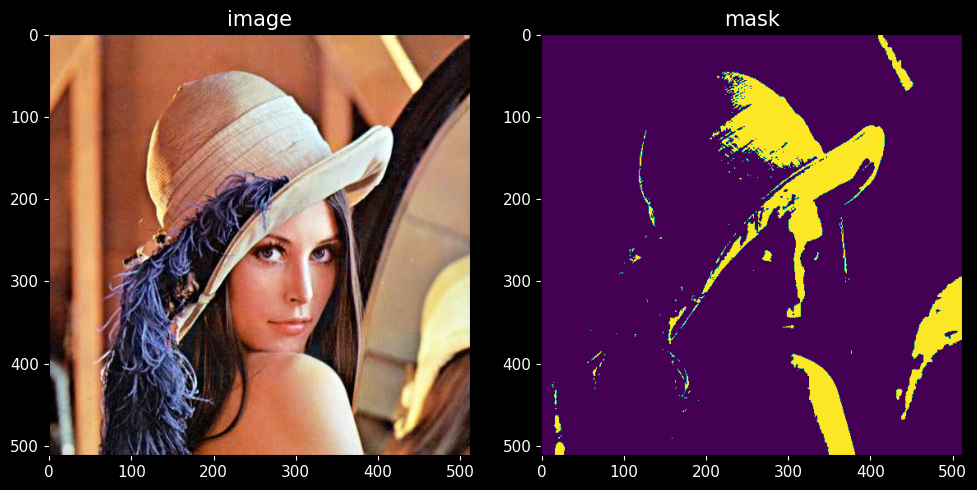

In [3]:
from utils.image.mask_utils import create_color_mask

# (255, 255, 255) is white but I reduced it to better fit
# Furthermore the 'threshold' argument allows to take variation into account
color = (225, 225, 225)
mask = create_color_mask(image, color, threshold = 50)

plot_multiple(image = image, mask = mask, plot_type = 'imshow', horizontal = True)

## Bounding boxes

The `shape` argument is typically a `bounding_box.Shape` enum item, but it can also be passed as a string (thansk to the `utils.get_enum_item` function).

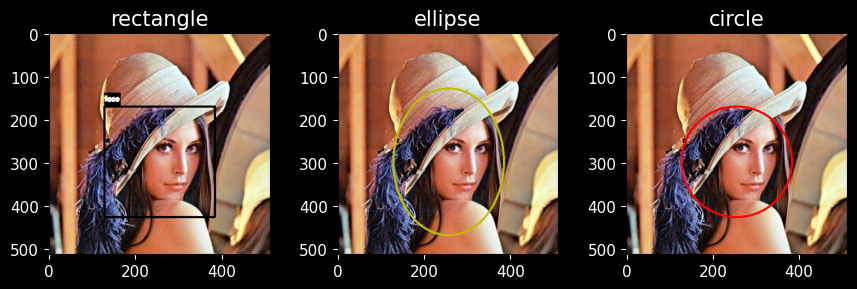

In [5]:
box = [len(image) // 4, len(image) // 3, len(image) // 2, len(image) // 2]

rectangle = draw_boxes(image, box, labels = ['face'], color = 'black')
ellipse   = draw_boxes(image, box, shape = Shape.ELLIPSE, color = 'y')
circle    = draw_boxes(image, box, shape = 'circle')

plot_multiple(
    rectangle = rectangle, ellipse = ellipse, circle = circle,
    plot_type = 'imshow', horizontal = True, size = 3, ncols = 3
)

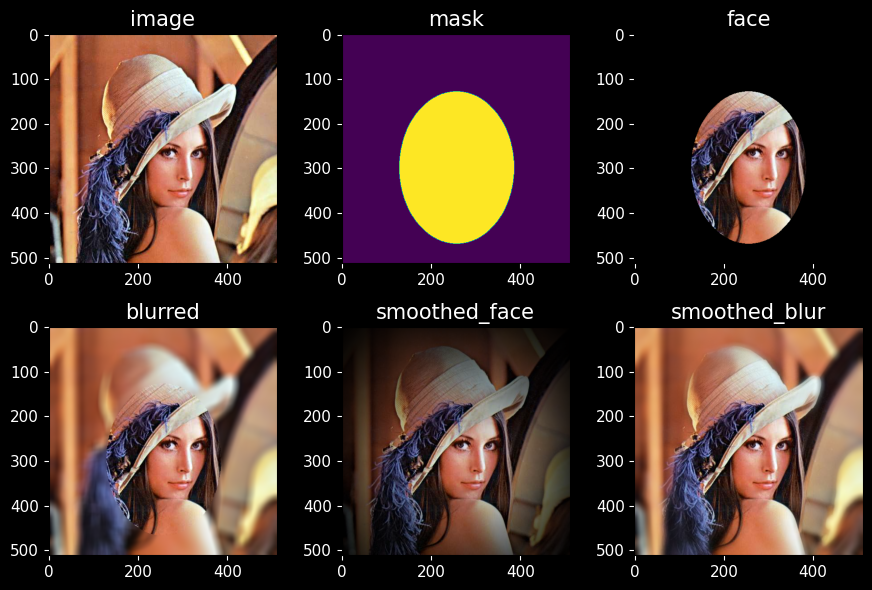

In [10]:
mask  = box_as_mask(image, box, shape = Shape.OVALE, dezoom_factor = 1.)

face  = apply_mask(image, mask, method = 'keep')
blur  = apply_mask(image, mask, method = 'blur', on_background = True)

smoothed_face  = apply_mask(image, mask, method = 'keep', smooth = True, smooth_size = 0.75)
smoothed_blur  = apply_mask(image, mask, method = 'blur', on_background = True, smooth = True)

plot_multiple(
    image = image, mask = mask, face = face, blurred = blur,
    smoothed_face = smoothed_face, smoothed_blur = smoothed_blur,
    plot_type = 'imshow', ncols = 3, size = 3, filename = 'example_data/plots/example_mask.png', show = True
)

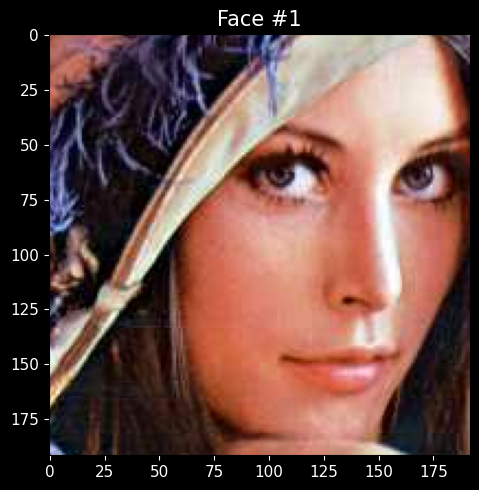

In [7]:
show_boxes(path, box, dezoom_factor = 0.75, labels = ['Face'])